   <h1 style = "font-size:40px;font-family: Comic Sans MS;text-align: center;background-color:lightblue;color:red">Audio Feature Extraction

 ##  Kaggle notebook [here](https://www.kaggle.com/code/shreyasajal/birdclef-librosa-audio-feature-extraction)

 ### Full blog [here](https://rramnauth2220.github.io/blog/posts/code/200525-feature-extraction.html#bachu-2010)

In [3]:
import os
import keras
import librosa
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import IPython.display as ipd

from glob import glob
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, minmax_scale

In [5]:
sr = 16000
dt = 2
N_CLASSES = 9
n_mels = 128
hop_length = 512
n_fft = 2048
frames = int((sr//hop_length)*dt+1)
n_values = int(sr*dt)
n_values

32000

In [7]:
def load_norm_trim(file, sr):
    audio, _ = librosa.load(file, sr=sr)
    audio_norm = librosa.util.normalize(audio)
    N = len(audio_norm)
    n_values_upper = int(1.5*n_values)
    if N<=n_values:
        d = n_values-N
        a = np.zeros((d,), dtype=np.float32)
        audio_final = np.concatenate((audio_norm, a))
    elif N>n_values and N<n_values_upper:
        audio_final = audio_norm[:n_values]
    else:
        top_db = 20
        audio_trim, index = librosa.effects.trim(audio_norm, top_db=top_db)
        N_trim = len(audio_trim)        
        while N_trim<2000 or N_trim>n_values_upper:
            if N_trim<2000:
                top_db += 1
                audio_trim, index = librosa.effects.trim(audio_norm, top_db=top_db)
                N_trim = len(audio_trim)                
            elif N_trim>n_values_upper:
                top_db -= 1
                audio_trim, index = librosa.effects.trim(audio_norm, top_db=top_db)
                N_trim = len(audio_trim)
        if N_trim<n_values:
            audio_final = audio_norm[index[0]:index[0]+n_values]
        else:
            audio_final = audio_trim[:n_values]
            
    return audio_final

In [9]:
def get_data(path):
    wav_paths = glob('{}/**'.format(path), recursive=True)  # list of all audio file paths
    wav_paths = [x.replace(os.sep, '/') for x in wav_paths if '.wav' in x]  # list of all audio paths
    
    classes = sorted(os.listdir(path))  # make a list of classes
    le = LabelEncoder()
    le.fit(classes)

    labels1 = [os.path.split(x)[0].split('/')[-1] for x in wav_paths]  # split the wav_paths to store all lables
    labels = le.transform(labels1)
    file_names = [os.path.split(x)[1] for x in wav_paths]

    X = np.zeros((1, n_values), dtype=np.float32)  # create empty array to store audio samples later
    Y = np.zeros((1, N_CLASSES), dtype=np.float32)
    
    start = 20          # should be less than total files per bol folder i.e. 82 in this case
    
    for i in range(start, len(wav_paths), 82):
        audio = load_norm_trim(wav_paths[i], sr)
        audio = np.reshape(audio, (1, n_values))
        X = np.append(X, audio, axis=0)
        print(labels1[i], file_names[i])
        y = to_categorical(labels[i], num_classes=N_CLASSES)      
        y = np.reshape(y, (1, N_CLASSES))
        Y = np.append(Y, y, axis=0)

    X = np.delete(X, 0, axis=0)
    Y = np.delete(Y, 0, axis=0)
        
    return X, Y

In [17]:
pc = "Dhwani Lab"
# pc = "arock"
path = "C:/Users/" + pc + "\OneDrive - IIT Kanpur\Recent study\Tabla ML Work\Tabla data\Mel Data v2"
path

<>:3: SyntaxWarning: invalid escape sequence '\O'
<>:3: SyntaxWarning: invalid escape sequence '\O'
C:\Users\Dhwani Lab\AppData\Local\Temp\ipykernel_5816\671382703.py:3: SyntaxWarning: invalid escape sequence '\O'
  path = "C:/Users/" + pc + "\OneDrive - IIT Kanpur\Recent study\Tabla ML Work\Tabla data\Mel Data v2"


'C:/Users/Dhwani Lab\\OneDrive - IIT Kanpur\\Recent study\\Tabla ML Work\\Tabla data\\Mel Data v2'

In [19]:
X, Y = get_data(path)
N = X.shape[0]
X.shape, Y.shape

1_ta Ta_A_P_1.wav
2_tin Tin_A_N_2 - Copy.wav
3_tun Tun_A_P_1.wav
5_te Te_A_P_1.wav
6_ga Ga_A_P_1.wav
7_ka Ka_A_P_1.wav
8_dha Dha_A_P_1.wav
9_dhin Dhin_A_P_1.wav


((8, 32000), (8, 9))

In [153]:
classes = os.listdir(path)
bols = []
for i in range(len(classes)):
    a = list(classes[i])[2:]
    b = ''
    for j in range(len(a)):
        b = b + a[j]
        
    bols.append(b)
bols

['ta', 'tin', 'tun', 'the', 'te', 'ga', 'ka', 'dha', 'dhin']

<h1 style="font-size:35px;font-family:comic sans ms;text-align:center;color:red"> Waveplot

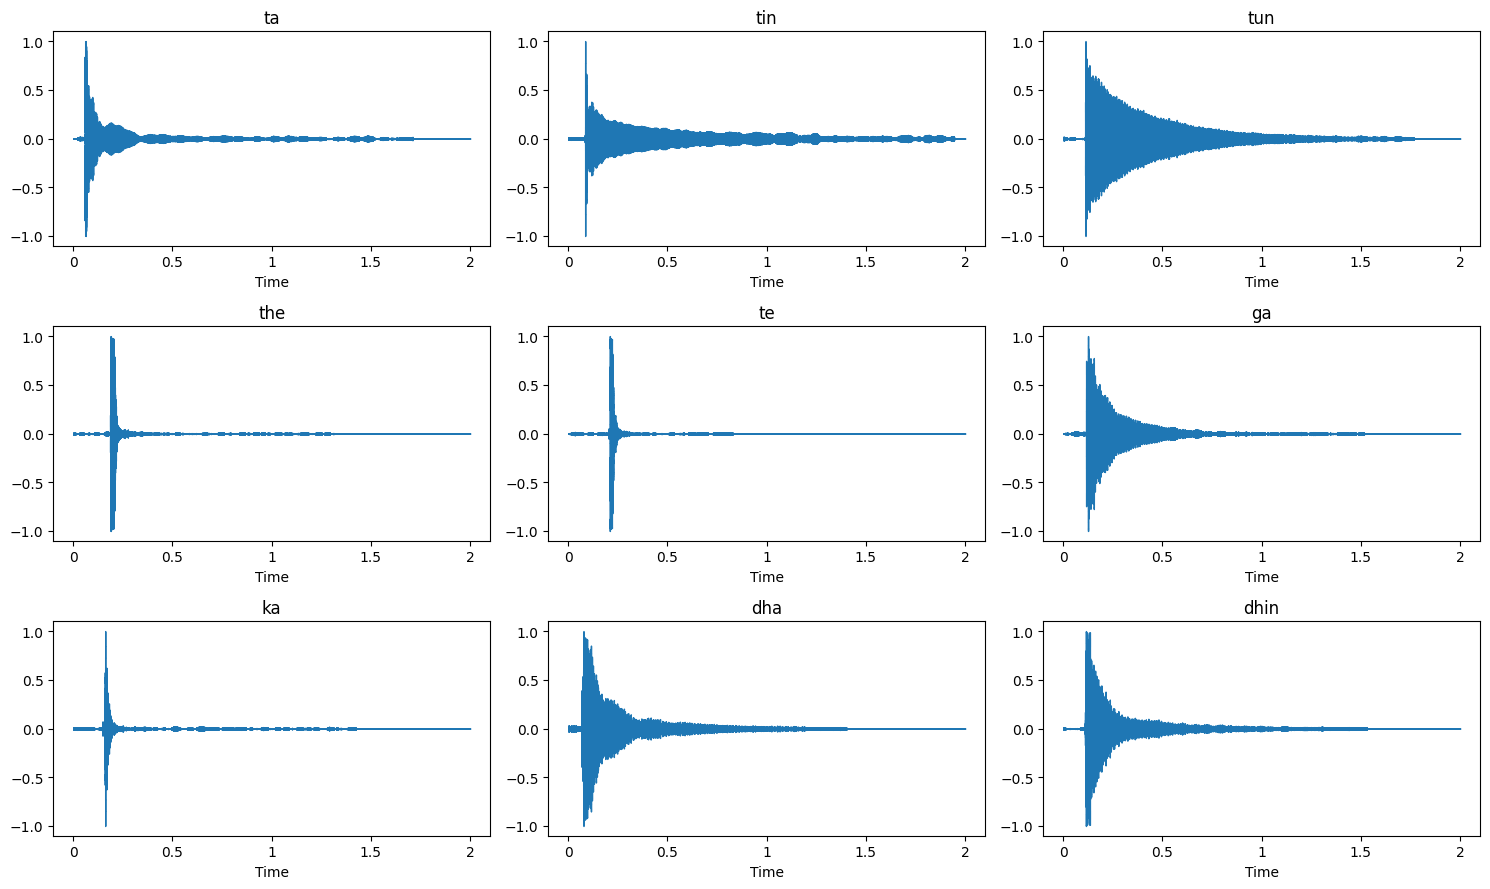

In [154]:
plt.figure(figsize=(15, 9))
for i in range(N):
    plt.subplot(3, 3, i+1)
    librosa.display.waveshow(y=X[i,:], sr=sr)
    plt.title(bols[i])
plt.tight_layout()

## Audio IPython display

In [88]:
k = 0
print(bols[k])
ipd.Audio(data=X[k,:], rate=sr)

ta


In [89]:
k = 1
print(bols[k])
ipd.Audio(data=X[k,:], rate=sr)

tin


In [90]:
k = 2
print(bols[k])
ipd.Audio(data=X[k,:], rate=sr)

tun


In [91]:
k = 3
print(bols[k])
ipd.Audio(data=X[k,:], rate=sr)

the


In [92]:
k = 4
print(bols[k])
ipd.Audio(data=X[k,:], rate=sr)

te


In [93]:
k = 5
print(bols[k])
ipd.Audio(data=X[k,:], rate=sr)

ga


In [94]:
k = 6
print(bols[k])
ipd.Audio(data=X[k,:], rate=sr)

ka


In [95]:
k = 7
print(bols[k])
ipd.Audio(data=X[k,:], rate=sr)

dha


In [96]:
k = 8
print(bols[k])
ipd.Audio(data=X[k,:], rate=sr)

dhin


## Features

<h1 style="font-size:35px;font-family:comic sans ms;text-align:center;color:green"> Fast Fourier Transform

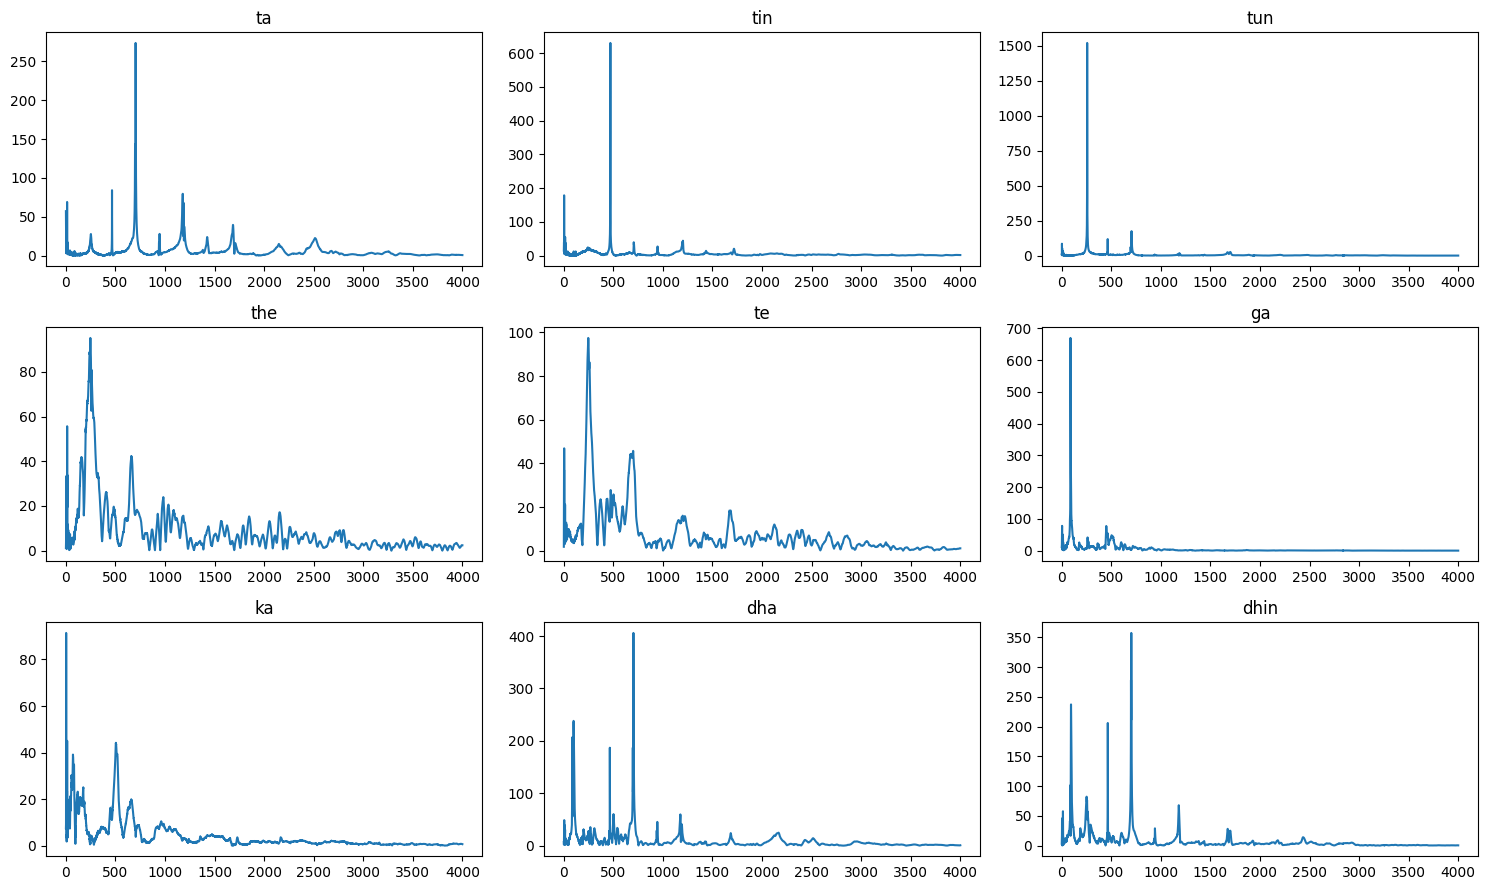

In [155]:
plt.figure(figsize=(15, 9))
for i in range(N):
    plt.subplot(3, 3, i+1)
    fft_comp = np.fft.fft(X[i, :])
    fft_freq_all = np.fft.fftfreq(len(X[i, :]), d=1/sr)
    positive_indices = fft_freq_all > 0
    fft_freq = fft_freq_all[positive_indices]
    fft_abs = np.abs(fft_comp)[positive_indices]
    plt.plot(fft_freq[:8000], fft_abs[:8000])
    plt.title(bols[i])
plt.tight_layout()

<h1 style='font-size:30px;font-family:comic sans ms;text-align:center;color:blue'> Short Time Fourier Transform

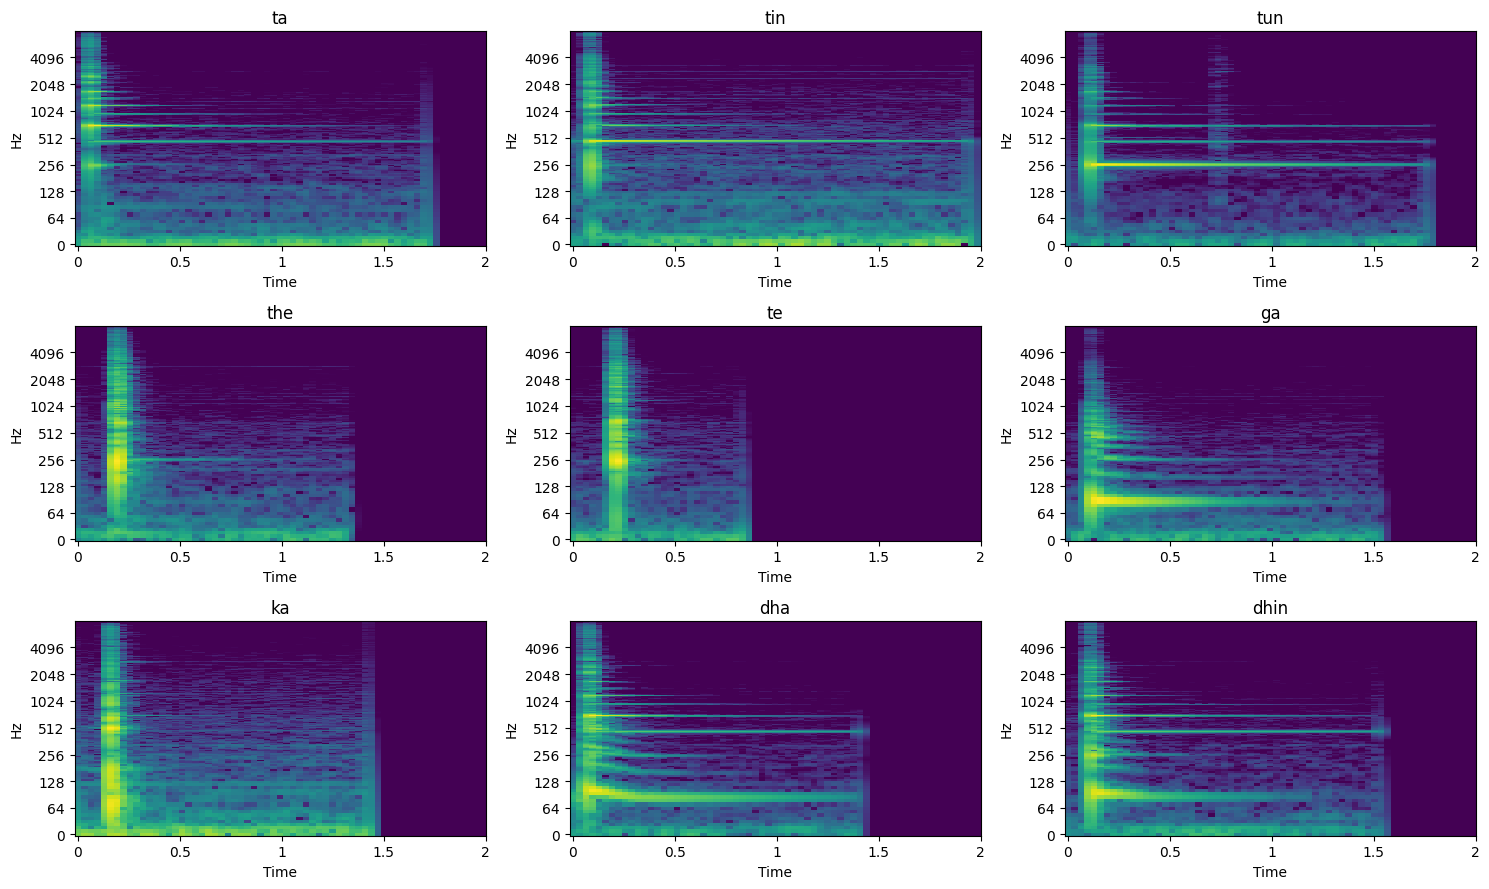

In [156]:
plt.figure(figsize=(15, 9))
for i in range(N):
    plt.subplot(3, 3, i+1)
    spec = np.abs(librosa.stft(y=X[i, :], n_fft=n_fft, hop_length=hop_length))
    spec_db = librosa.amplitude_to_db(spec)
    librosa.display.specshow(spec_db, sr=sr, y_axis='log', x_axis='time', cmap=None )
    plt.title(bols[i])
plt.tight_layout()

<h1 style = "font-size:35px; font-family:comic sans ms; text-align:center; color:pink"> RMSE

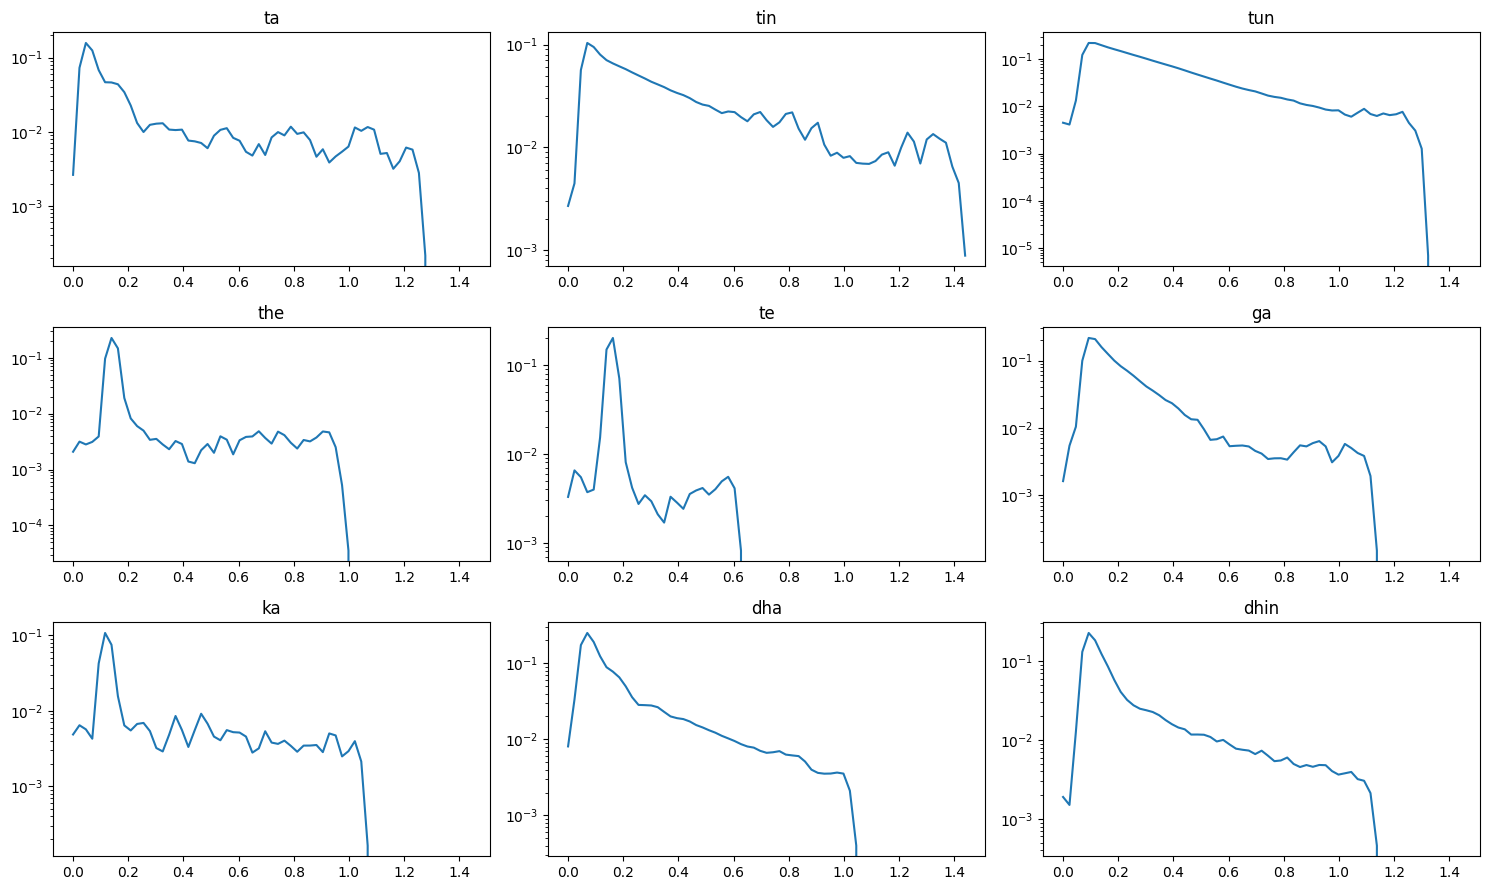

In [157]:
plt.figure(figsize=(15, 9))
for i in range(N):
    plt.subplot(3, 3, i+1)
    S, phase = librosa.magphase(librosa.stft(X[i, :]))
    S_db = librosa.amplitude_to_db(S, ref=np.max)
    rms = librosa.feature.rms(S=S)
    times = librosa.times_like(rms)
    plt.semilogy(times, rms[0], label='RMS Energy')
    plt.title(bols[i])
plt.tight_layout()

<h1 style = "font-size:40px; font-family:comic sans ms; text-align:center;color:orange"> Mel Spectrogram

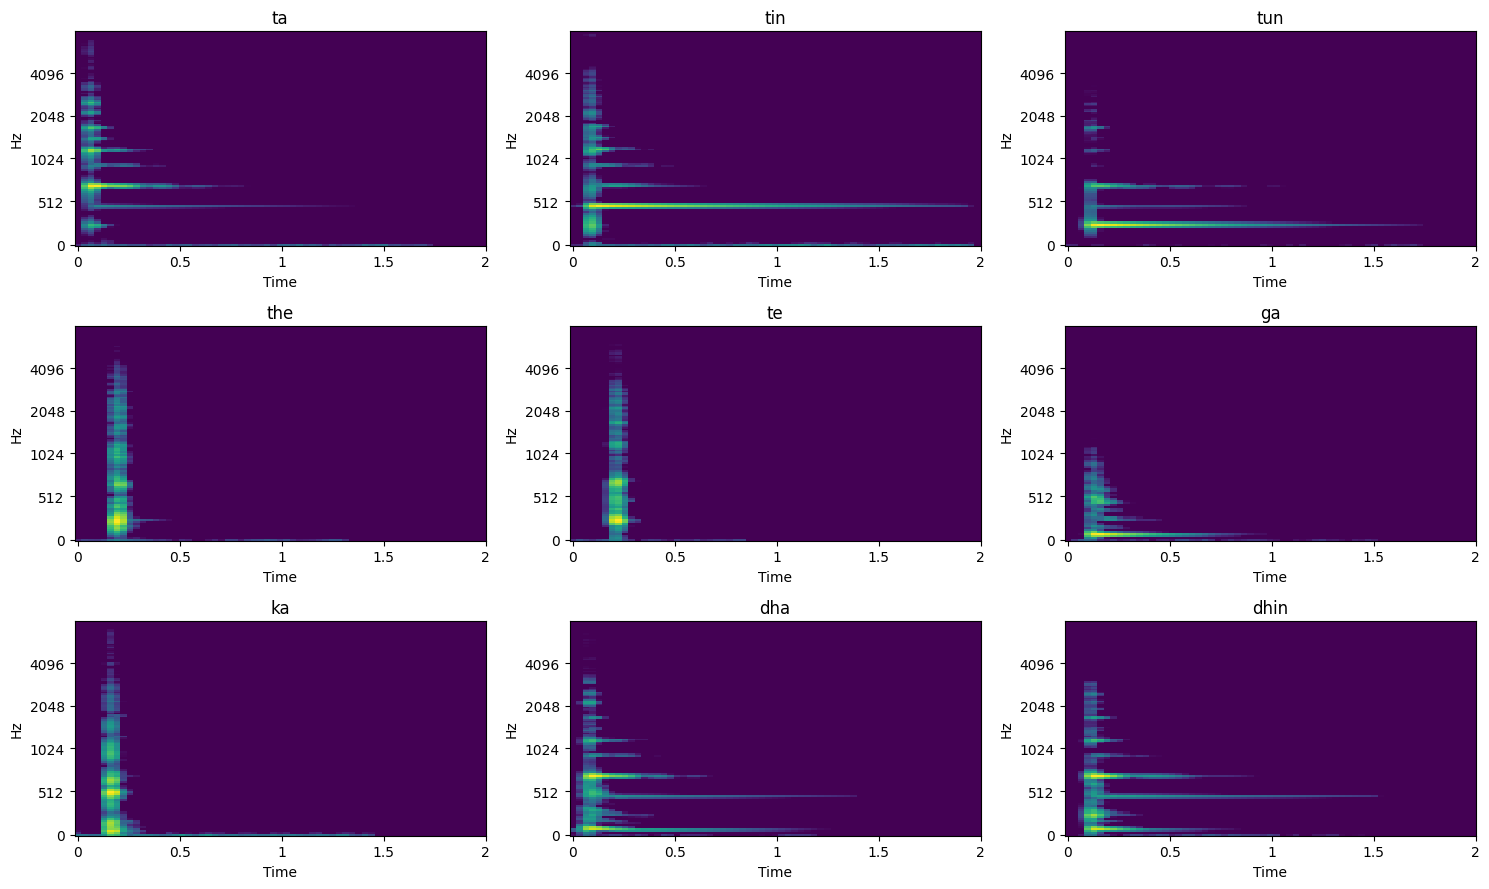

In [158]:
plt.figure(figsize=(15, 9))
for i in range(N):
    plt.subplot(3, 3, i+1)
    spec = librosa.feature.melspectrogram(y=X[i, :], sr=sr, n_mels=128)
    spec_db = librosa.amplitude_to_db(spec)
    librosa.display.specshow(spec_db, sr=sr, y_axis='mel', x_axis='time', cmap=None)
    plt.title(bols[i])
plt.tight_layout()

<h1 style = "font-size:35px; font-family:comic sans ms; text-align:center;color:green">  Zero Crossing Rate

In [159]:
# zcr= []
# for i in range(N):
#     z = librosa.zero_crossings(X[i,:], pad=False)
#     zcr.append(sum(z))

# d = {'BOLS':bols, 'ZCR':zcr}
# plt.figure(figsize=(12, 4))
# plt.bar(d['BOLS'], d['ZCR'], color='blue', width=0.3)
# plt.title("Zero Crossing Rate")

Text(0.5, 1.0, 'Zero Crossing Rate')

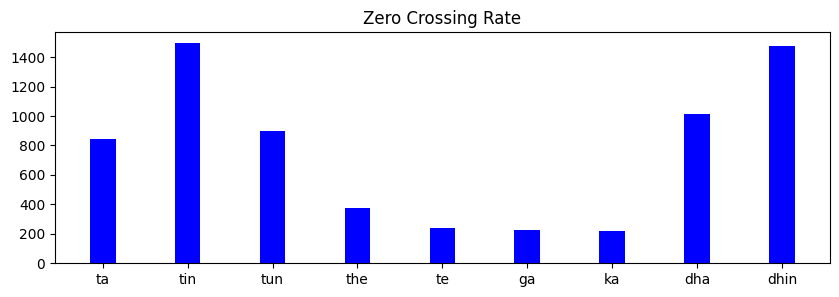

In [160]:
d = {'BOLS':bols, 'ZCR':[sum(librosa.zero_crossings(X[i,:], pad=False)) for i in range(N)]}
plt.figure(figsize=(10, 3))
plt.bar(d['BOLS'], d['ZCR'], color='blue', width=0.3)
plt.title("Zero Crossing Rate")

<h1 style = "font-size:35px; font-family:comic sans ms; text-align:center;color:brown">  Separation of Harmonic & Percussive Signals

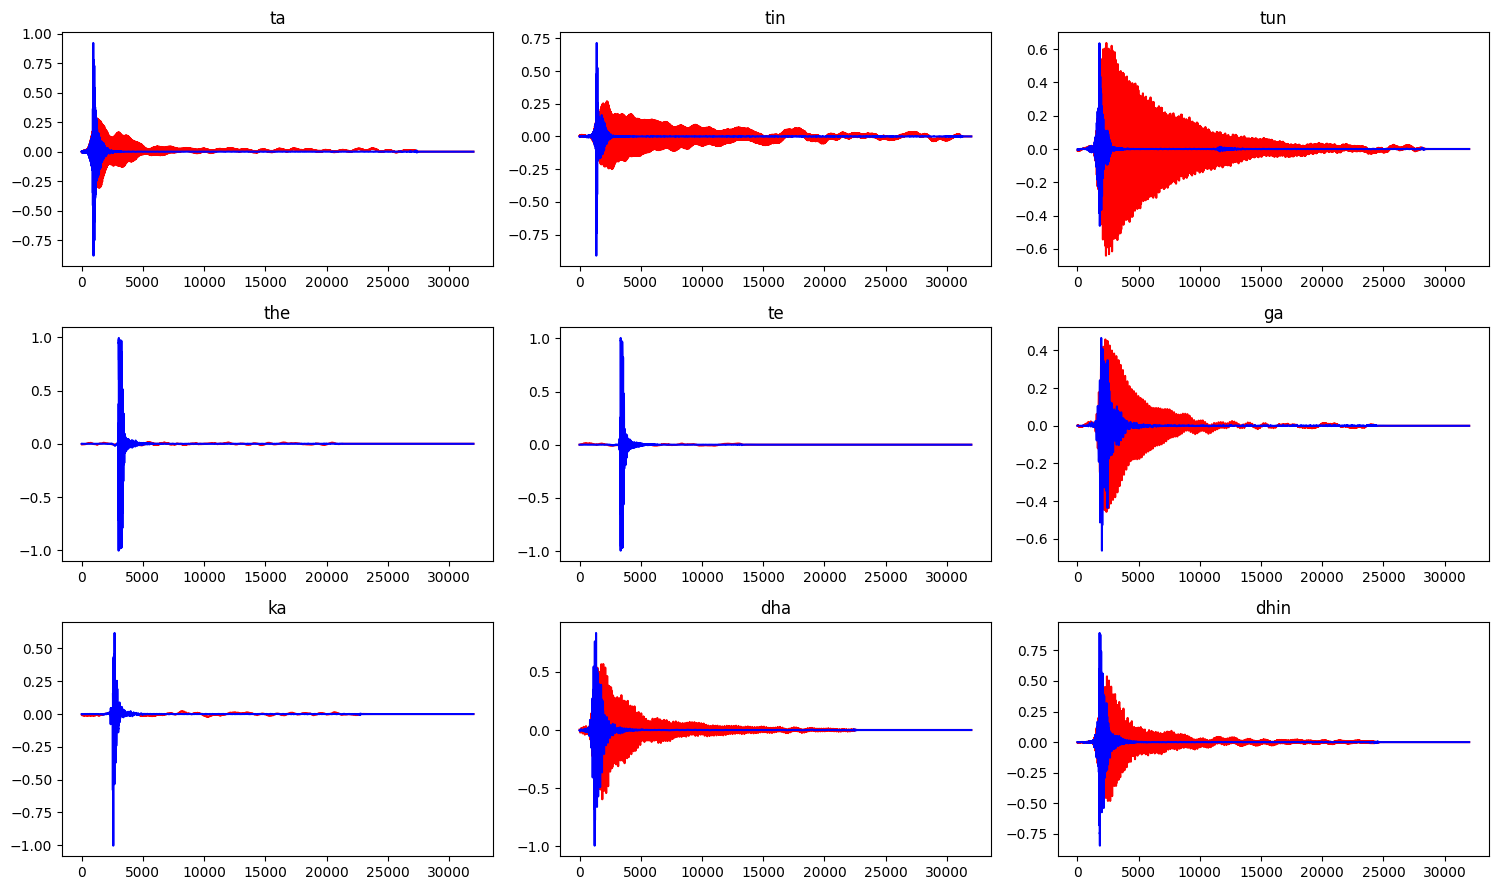

In [161]:
plt.figure(figsize=(15, 3*3))
for i in range(N):
    plt.subplot(3, 3, i+1)
    y_harm, y_perc = librosa.effects.hpss(X[i, :])
    plt.plot(y_harm, color='red', label='Harmonic')
    plt.plot(y_perc, color='blue', label='Percusive')
    plt.title(bols[i])
plt.tight_layout()

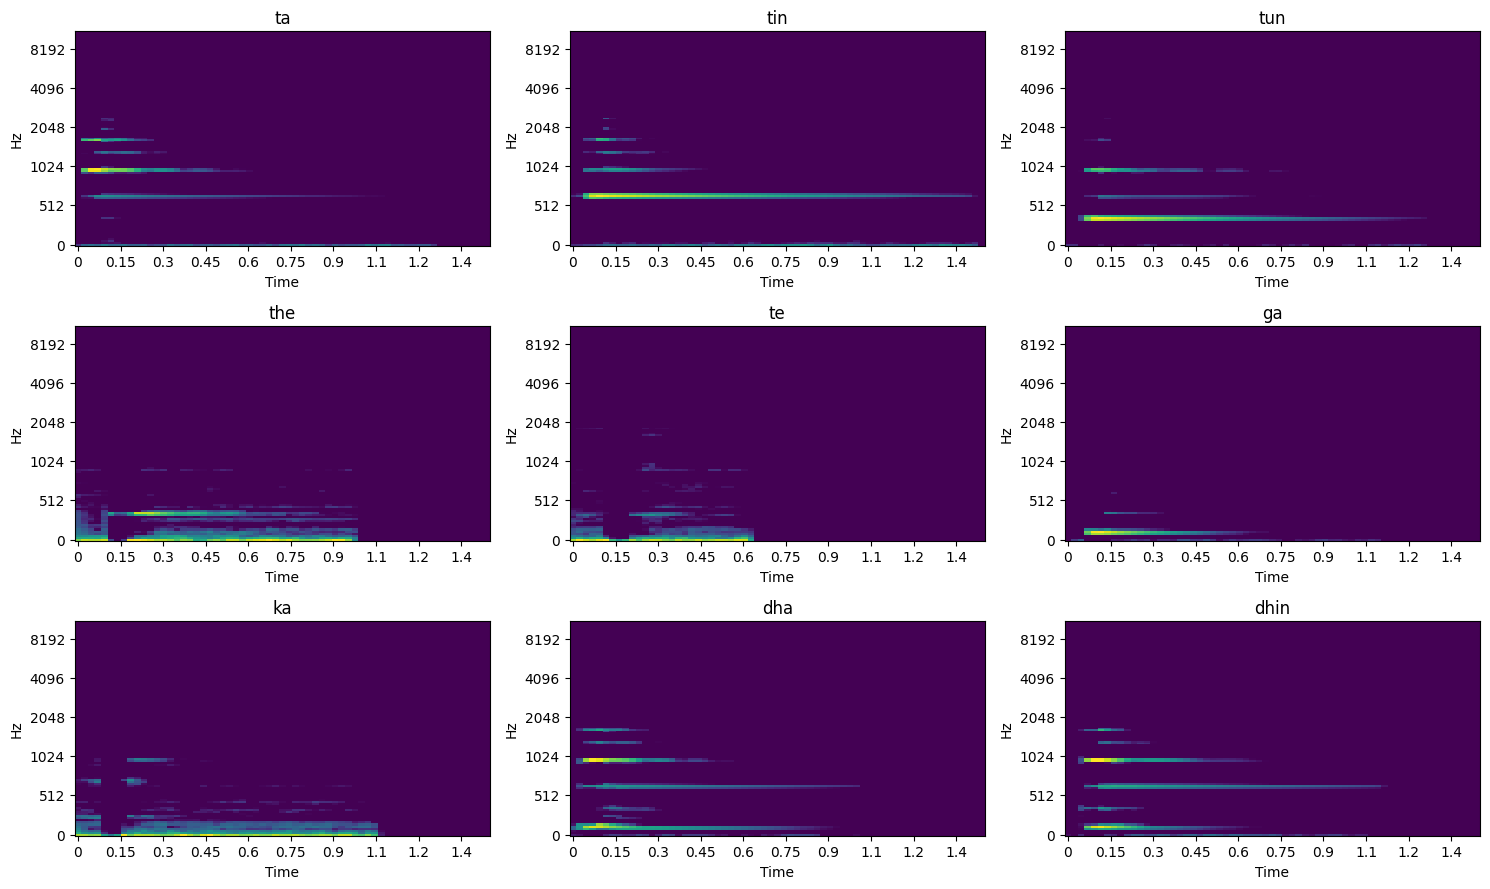

In [162]:
plt.figure(figsize=(15, 9))
for i in range(N):
    plt.subplot(3, 3, i+1)
    spec = librosa.feature.melspectrogram(y=X[i, :])    
    H, P = librosa.decompose.hpss(spec)
    # plt.subplot(3, 1, 1)
    # librosa.display.specshow(librosa.amplitude_to_db(spec), y_axis='mel', x_axis='time', cmap=None)
    # plt.subplot(2, 1, 1)
    librosa.display.specshow(librosa.amplitude_to_db(H), y_axis='mel', x_axis='time', cmap=None)
    # plt.subplot(2, 1, 2)
    # librosa.display.specshow(librosa.amplitude_to_db(np.abs(P)), y_axis='mel', x_axis='time', cmap=None)
    plt.title(bols[i])
plt.tight_layout()

<h1 style = "font-size:35px; font-family:comic sans ms; text-align:center;color:orange"> Beat Extraction

Text(0.5, 1.0, 'Beats per minute')

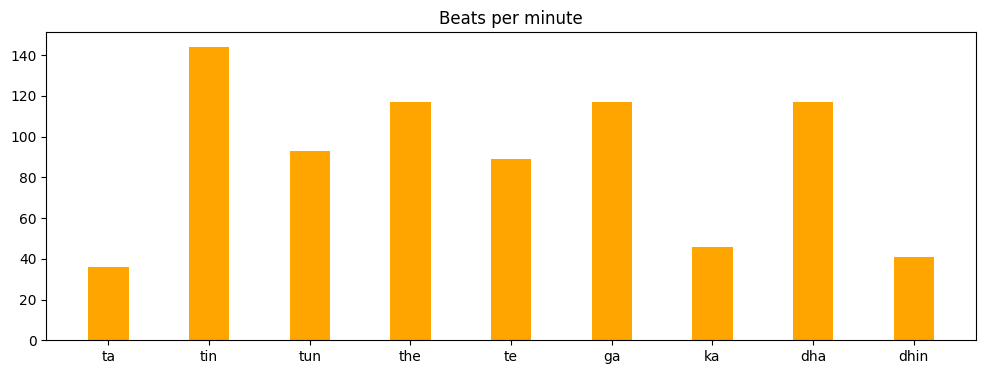

In [163]:
d = {'BOLS':bols, 'BPM':[int(librosa.beat.beat_track(y=X[i, :], sr=sr)[0][0]) for i in range(N)]}

plt.figure(figsize=(12, 4))
plt.bar(d['BOLS'], d['BPM'], color='orange', width=0.4)
plt.title("Beats per minute")

<h1 style="font-family:comic sans MS; text-align:center;color:blue"> Chromagram

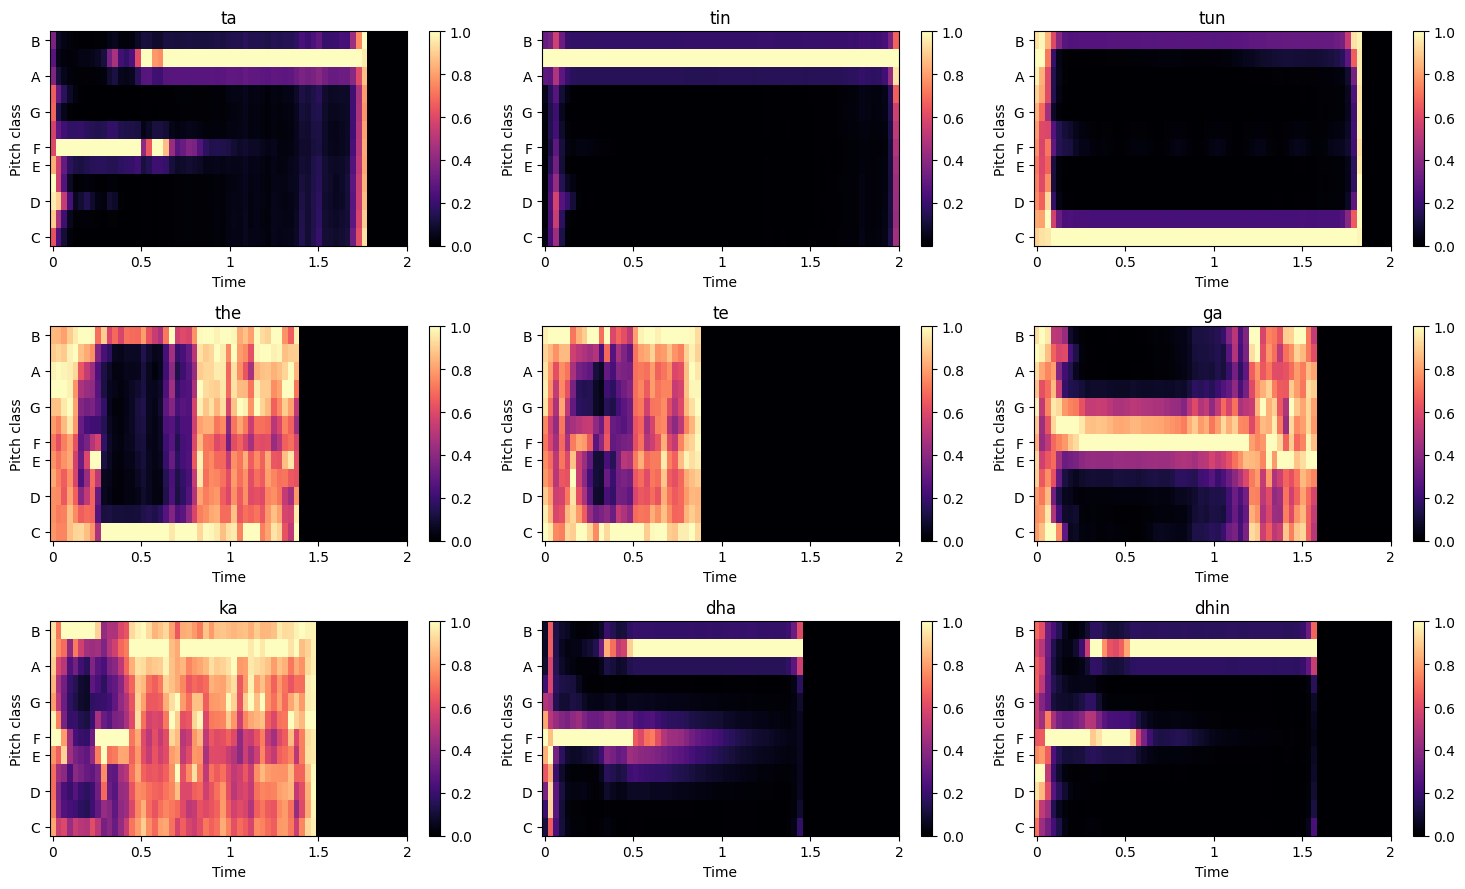

In [164]:
plt.figure(figsize=(15, 9))
for i in range(N):
    plt.subplot(3, 3, i+1)
    chroma = librosa.feature.chroma_stft(y=X[i, :], sr=sr)
    librosa.display.specshow(chroma, sr=sr, y_axis='chroma', x_axis='time')
    plt.colorbar()
    plt.title(bols[i])
plt.tight_layout()

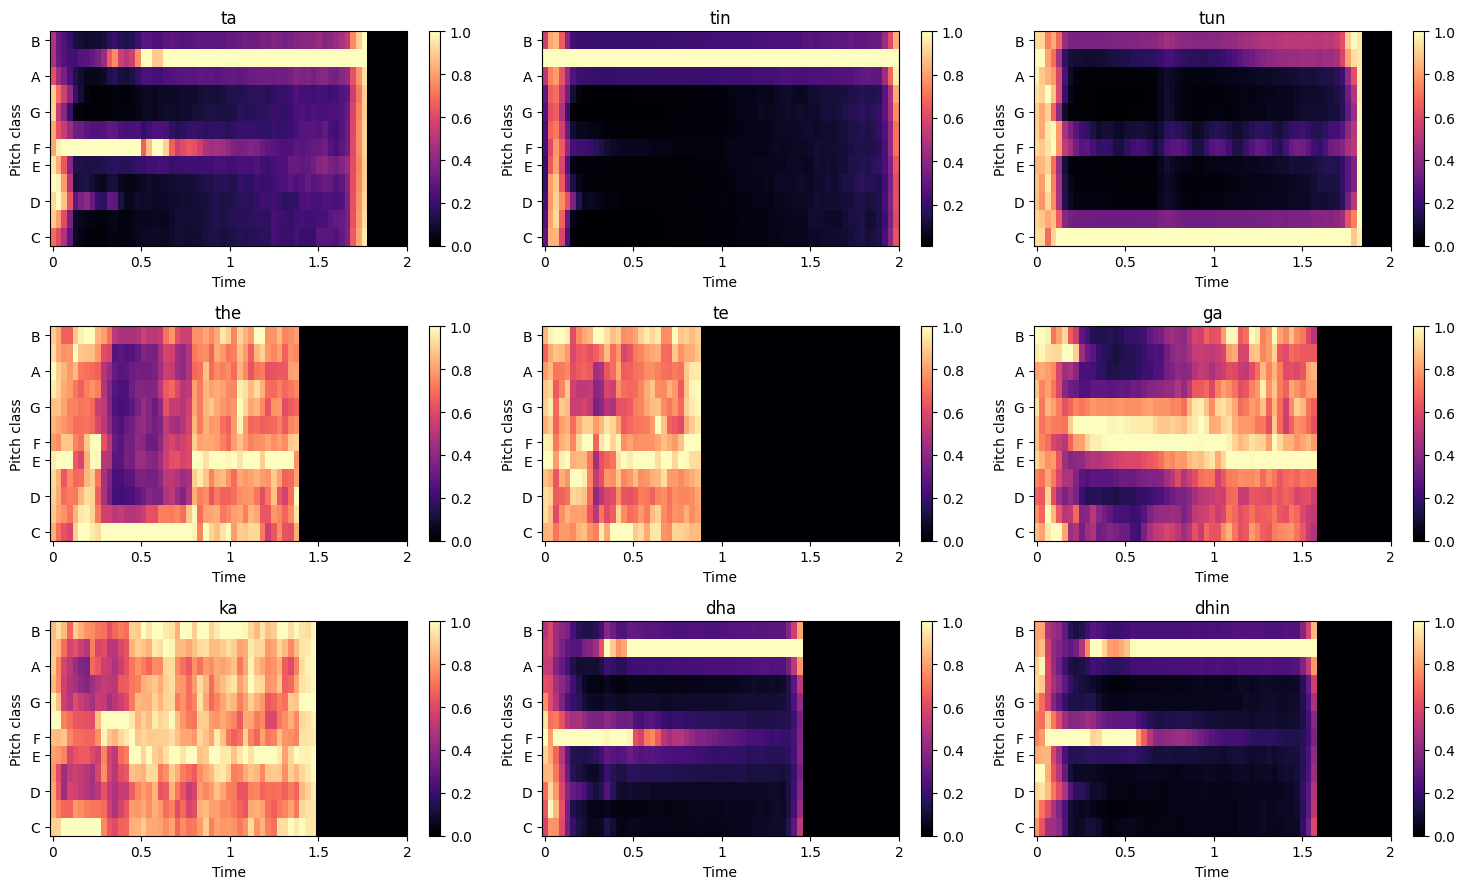

In [165]:
plt.figure(figsize=(15, 9))
for i in range(N):
    plt.subplot(3, 3, i+1)
    S = np.abs(librosa.stft(y=X[i, :]))
    chroma = librosa.feature.chroma_stft(S=S, sr=sr)
    librosa.display.specshow(chroma, sr=sr, y_axis='chroma', x_axis='time')
    plt.colorbar()
    plt.title(bols[i])
plt.tight_layout()

<h1 style = "font-size:35px; font-family:comic sans ms; text-align:center;color:purple"> Constant Q-Transform (CQT)

In [166]:
# plt.figure(figsize=(15, 9))
# for i in range(N):
#     plt.subplot(3, 3, i+1)
#     chroma = librosa.feature.chroma_cqt(y=X[i, :])
#     librosa.display.specshow(chroma, sr=sr, y_axis='chroma', x_axis='time')
#     plt.colorbar()
#     plt.title(bols[i])
# plt.tight_layout()

<h1 style="font-family:comic sans ms;text-align:center;color:green"> Spectral Centroids

In [167]:
# plt.figure(figsize=(15, 9))
# def normalize(x, axis=0):
#         return minmax_scale(x, axis=axis)
# for i in range(N):
#     plt.subplot(3, 3, i+1)
#     spectral_centroids = librosa.feature.spectral_centroid(y=X[i, :])[0]
#     frames = range(len(spectral_centroids))
#     t = librosa.frames_to_time(frames)
    
#     librosa.display.waveshow(X[i, :])
#     plt.plot(t, normalize(spectral_centroids))#, color='#FFB100', lw=2)
#     plt.title(bols[i])
# plt.tight_layout()

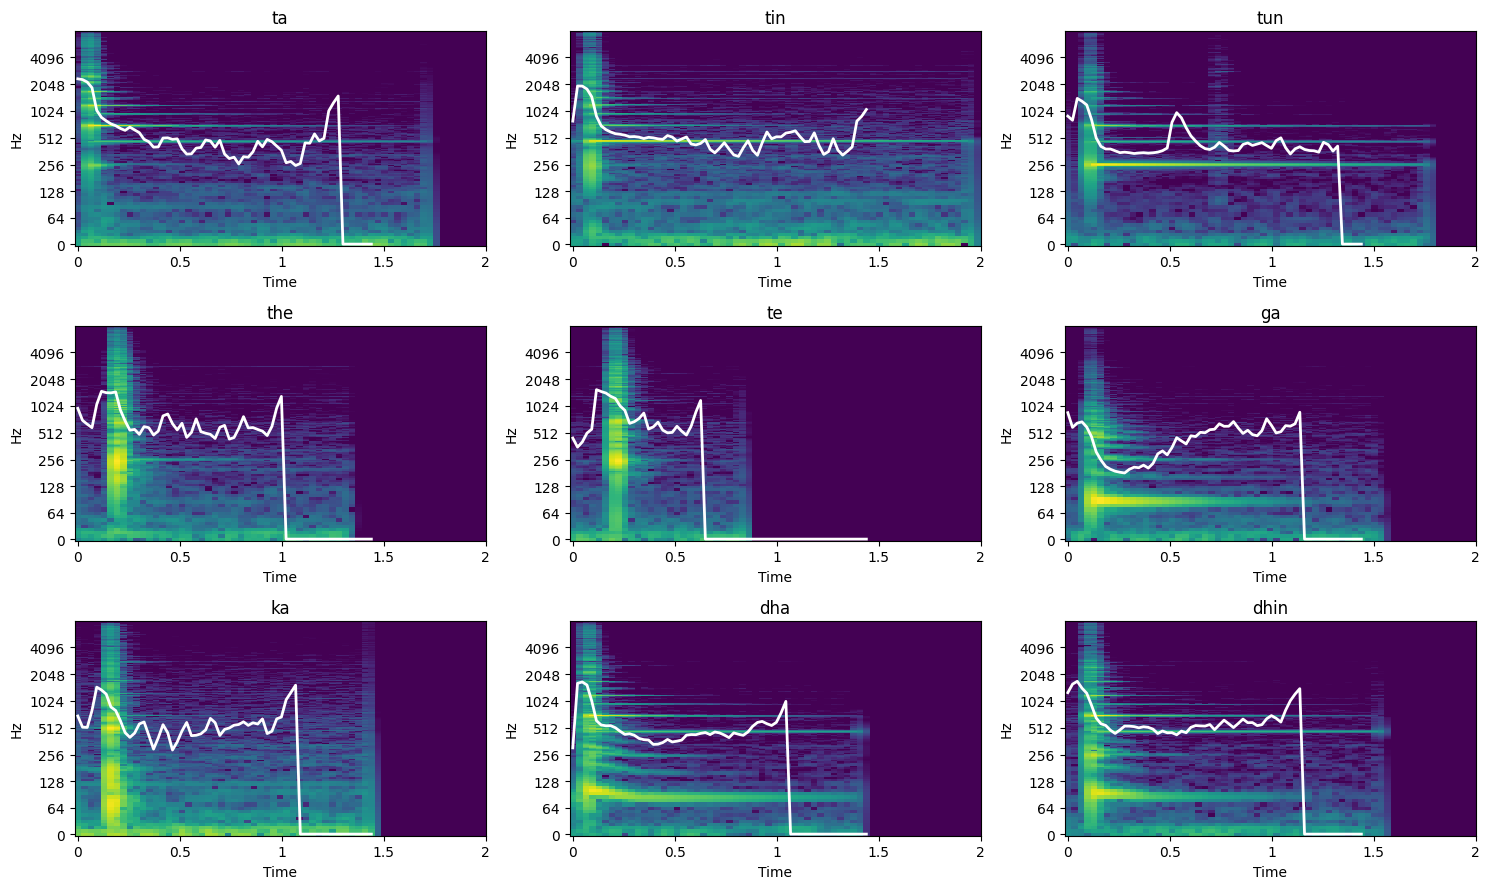

In [168]:
plt.figure(figsize=(15, 3*3))
for i in range(N):
    plt.subplot(3, 3, i+1)
    cent = librosa.feature.spectral_centroid(y=X[i, :], sr=sr)
    times = librosa.times_like(cent)
    spec = np.abs(librosa.stft(y=X[i, :]))
    spec_db = librosa.amplitude_to_db(spec)
    librosa.display.specshow(spec_db, sr=sr, y_axis='log', x_axis='time', cmap=None)
    plt.plot(times, cent.T, color='w', lw=2)
    plt.title(bols[i])
plt.tight_layout()

<h1 style="font-size:40px;font-family:comic sans ms;text-align:center;color:violet"> MFCC - Mel Frequency Cepstral Coefficients

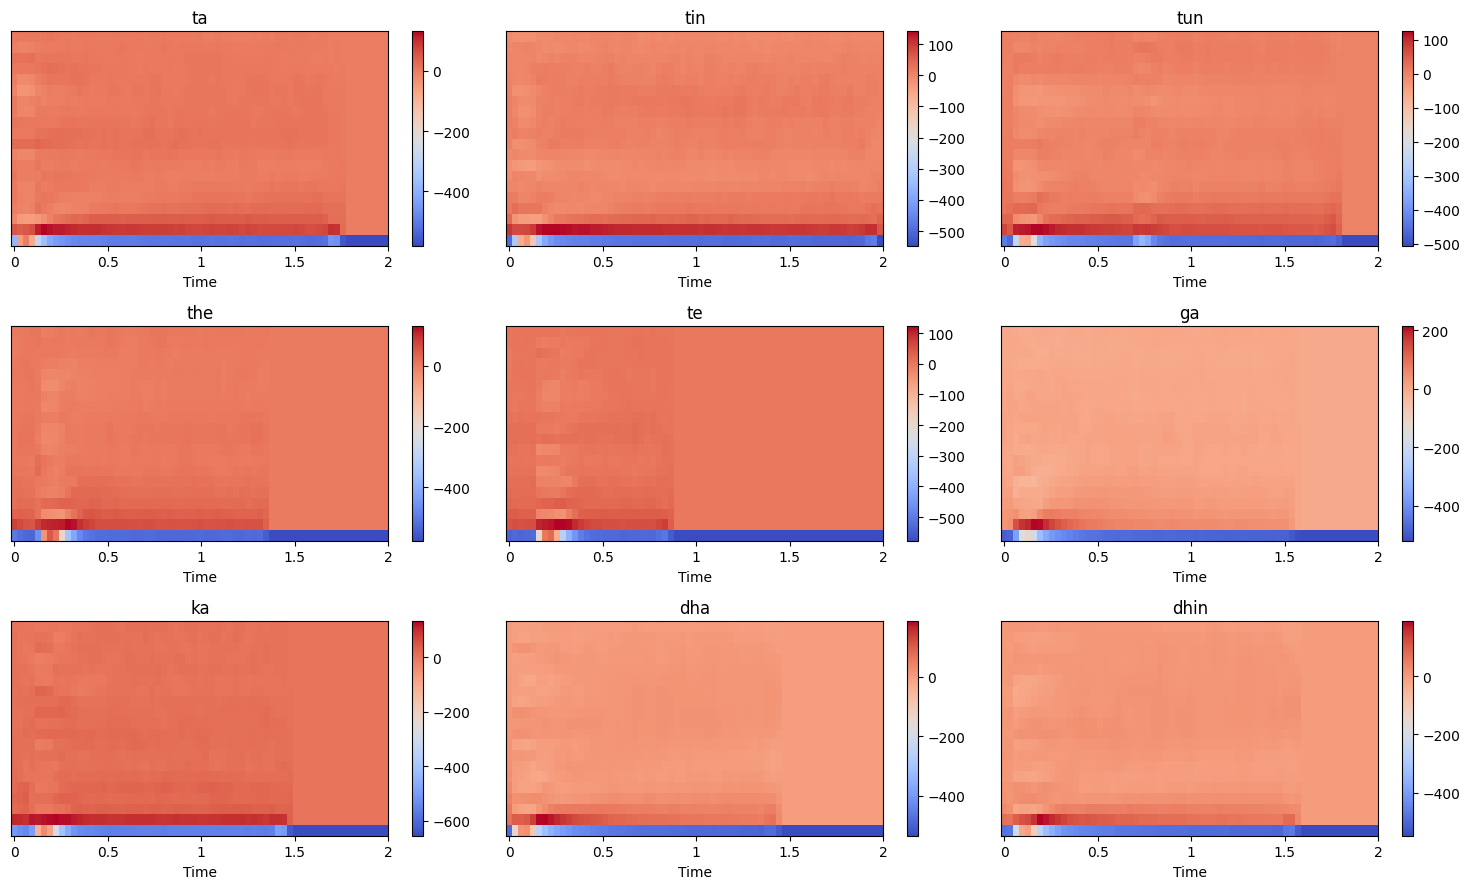

In [169]:
plt.figure(figsize=(15, 9))
for i in range(N):
    plt.subplot(3, 3, i+1)
    chroma = librosa.feature.mfcc(y=X[i, :], sr=sr)
    librosa.display.specshow(chroma, sr=sr, x_axis='time')
    plt.colorbar()
    plt.title(bols[i])
plt.tight_layout()